In [1]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

Welcome to JupyROOT 6.26/08


In [13]:
def file_conversion(input_file, output_file):
    f = open(const.REF_DIR+f"/{input_file}")

    lines = []
    for line in f.readlines():

        l = line.split(",")
        temp = []
        for s in l:
            s = s.replace("'", '')
            s = s.replace("[", '')
            s = s.replace("]", '')
            try:
                temp.append(float(s))
            except:
                continue
        if len(temp)>0:

            lines.append(temp)

    lines = np.asarray(lines)
    print(lines)
    if len(lines[0]) == 3:
        tab = Table(lines, names = ["x", "dNdE", "mass"])
    elif len(lines[0]) ==4:
        tab = Table(lines, names = ["x", "dNdE", "dNdE_endpoint", "mass"])
#    tab = Table(lines, names = ["mass", "signu"])
    np.save(const.REF_DIR+f"/{output_file}.npy",tab)
    
def change_file(new, old):
    os.system("mv "+const.REF_DIR+f"/wino_dnde.npy "+const.REF_DIR+f"/{old}.npy" )
    os.system("mv "+const.REF_DIR+f"/{new}.npy "+const.REF_DIR+f"/wino_dnde.npy" )

In [18]:
file_conversion("dnde_results_binCent_endpoint.csv", "dnde_wino_endpoint")

[[3.16227766e-04 5.12836954e+02 1.50815375e-03 7.94328235e+02]
 [3.80342562e-04 4.77809783e+02 1.50821515e-03 7.94328235e+02]
 [4.57456554e-04 4.41298595e+02 1.50828901e-03 7.94328235e+02]
 ...
 [9.99222150e-01 4.48269858e-03 4.42769294e-03 1.99526231e+05]
 [9.99999919e-01 5.10446323e-01 5.10446324e-01 1.99526231e+05]
 [1.00000000e+00 8.06507842e-06 8.06507842e-06 1.99526231e+05]]


In [92]:
change_file("dnde_wino", "wino_dnde")

In [19]:
d1 = np.load(const.REF_DIR+"dnde_wino_hi.npy")
d2 = np.load(const.REF_DIR+"dnde_wino_lo.npy")

In [20]:

d = np.concatenate((d2, d1))

In [21]:
d

array([(3.16227766e-04, 5.05435622e+02,    800.),
       (3.80342562e-04, 4.70897504e+02,    800.),
       (4.57456554e-04, 4.34900009e+02,    800.), ...,
       (9.99222150e-01, 4.47802526e-03, 200000.),
       (9.99999919e-01, 5.11585009e-01, 200000.),
       (1.00000000e+00, 8.04569989e-06, 200000.)],
      dtype=[('x', '<f8'), ('dNdE', '<f8'), ('mass', '<f8')])

In [22]:
np.save(const.REF_DIR+"dnde_wino_final.npy", d)

In [93]:
data = WINOspectra(return_table=True)

In [94]:
data[data["x"] == 1]

x,dNdE,mass
float64,float64,float64
1.0,0.00232662040911501,800.0
1.0,0.0018505569243962836,1000.0
1.0,0.0014715787289407772,1250.0
1.0,0.0012202204052886001,1500.0
1.0,0.0010415046977878552,1750.0
1.0,0.0009079679810368641,2000.0
...,...,...
1.0,8.707981333327514e-06,185000.0
1.0,8.590156843086757e-06,187500.0


In [42]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [11]:
counts = []
for m in mass[::5]:
    h1 = combinedCalcSignal("Segue_1", m, DM_spectra="quintuplet", ext=True)
    cnts = getArray(h1)
    counts.append(sum(cnts[1]))

In [35]:
from scipy import integrate

<function scipy.integrate._quadpack_py.quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)>

In [38]:
sig = []
for m in mass[::5]:
    x = Qspectra(x = np.logspace(-4, 0, 100), M=m)
    dx = np.diff(np.logspace(-4, 0, 100))
    tot = sum((x[1:]+x[:-1])/2*dx)
    sig.append(tot)

In [65]:
sig_tot = []
for m in mass:
    x = Qspectra(x = np.logspace(-4, 0, 100), M=m)
    dx = np.diff(np.logspace(-4, 0, 100))
    tot = sum((x[1:]+x[:-1])/2*dx)
    sig_tot.append(tot)

In [19]:
d = np.load("/Users/dtak/Research/DarkMatter/Output/EventDisplay_Segue_1_quintuplet_1D_gaus.npy")

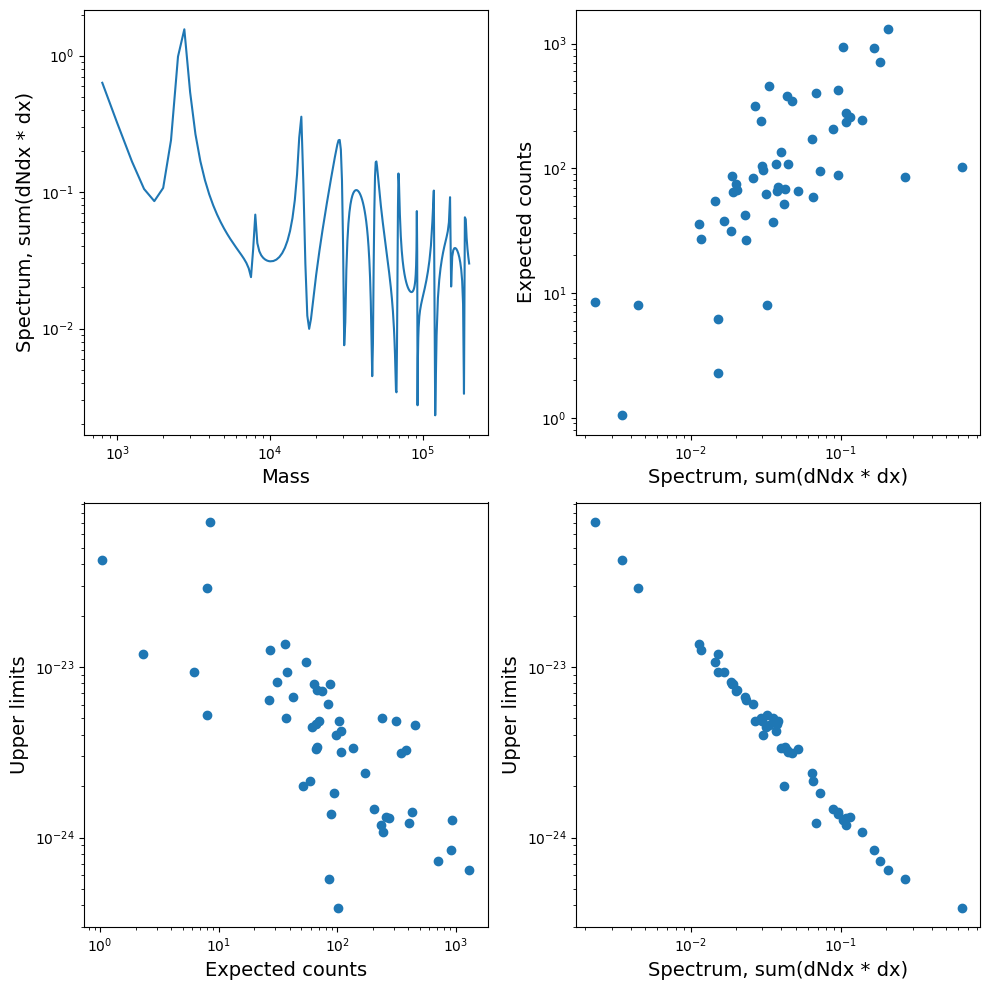

In [67]:
f, ax = plt.subplots(2,2, figsize=(10, 10))
ax[0][0].plot(mass, sig_tot)
ax[0][0].set_xscale("log")
ax[0][0].set_yscale("log")
ax[0][0].set_xlabel("Mass", fontsize=14)
ax[0][0].set_ylabel("Spectrum, sum(dNdx * dx)", fontsize=14)

ax[0][1].scatter(sig, counts)
ax[0][1].set_xscale("log")
ax[0][1].set_yscale("log")
ax[0][1].set_xlabel("Spectrum, sum(dNdx * dx)", fontsize=14)
ax[0][1].set_ylabel("Expected counts", fontsize=14)

ax[1][0].scatter(counts, 10**d[:,1])
ax[1][0].set_xscale("log")
ax[1][0].set_yscale("log")
ax[1][0].set_xlabel("Expected counts", fontsize=14)
ax[1][0].set_ylabel("Upper limits", fontsize=14)

ax[1][1].scatter(sig, 10**d[:,1])
ax[1][1].set_xscale("log")
ax[1][1].set_yscale("log")
ax[1][1].set_xlabel("Spectrum, sum(dNdx * dx)", fontsize=14)
ax[1][1].set_ylabel("Upper limits", fontsize=14)

plt.tight_layout()

In [79]:
mle = Likelihood.combinedUpperLimits("quintuplet", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, ext=True, 
                                     DM_spectra="quintuplet",mass=mass[::5], addTheta=False, averagedIRF=True, 
                                     statistic="unbinned",
                                     useBias=True, correction=True, bkgModel="gaus", 
                                     filename="EventDisplay_QLET_unbinned_old",)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : quintuplet
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 800 GeV
[Log] Maximum mass : 195 TeV


  0%|          | 0/52 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_QLET_unbinned_old.npy'


In [28]:

uls = {}

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

for i in trange(300):
    
    
    ul = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, 
                                         ext=True, DM_spectra="WINO",sys=True, mass=mass, addTheta=False, 
                                        averagedIRF=True, useBias=True, statistic="unbinned",
                                        correction=True, bkgModel="gaus", filename=False, signu=-25
                                        )
    for u in ul:
        if u[0] in uls.keys():

            uls[int(u[0])].append(u[1])
        else:
            uls[int(u[0])] = [u[1]]

np.save(const.OUTPUT_DIR+f"EventDisplay_stacked_sys_wino_1D_pub", uls)

  0%|          | 0/300 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


KeyboardInterrupt: 

[/opt/local/libexec/root6/lib/root/libCore.6.26.08.so] TUnixSystem::DispatchSignals(ESignals) (no debug info)
[/usr/lib/system/libsystem_platform.dylib] _sigtramp (no debug info)
[/usr/lib/system/libsystem_pthread.dylib] pthread_kill (no debug info)
[/usr/lib/system/libsystem_c.dylib] abort (no debug info)
[/usr/lib/libc++abi.dylib] __cxxabiv1::__aligned_malloc_with_fallback(unsigned long) (no debug info)
[/usr/lib/libc++abi.dylib] demangling_terminate_handler() (no debug info)
[/usr/lib/libobjc.A.dylib] _objc_terminate() (no debug info)
[/usr/lib/libc++abi.dylib] std::__terminate(void (*)()) (no debug info)
[/usr/lib/libc++abi.dylib] __cxa_get_exception_ptr (no debug info)
[/usr/lib/libc++abi.dylib] __cxxabiv1::exception_cleanup_func(_Unwind_Reason_Code, _Unwind_Exception*) (no debug info)
[<unknown binary>] (no debug info)
[/opt/local/libexec/root6/lib/root/libMinuit.6.26.08.so] TMinuit::Eval(int, double*, double&, double*, int) (no debug info)
[/opt/local/libexec/root6/lib/root/libM

libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyExcep

In [29]:
np.save(const.OUTPUT_DIR+f"EventDisplay_stacked_sys_wino_1D_pub", uls)

In [35]:
change_file("dnde_wino_endpoint", "dnde_wino_final")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [36]:
mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", 
                                     dwarfs=const.ListOfDwarf, method=2,
                                     ext=True, DM_spectra="wino",
                                     mass=mass, addTheta=False, averagedIRF=True, 
                                     useBias=True, 
                                     correction=True, bkgModel="gaus", filename="wino_ep_final", 
                                    )


[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

KeyboardInterrupt: 

[/opt/local/libexec/root6/lib/root/libCore.6.26.08.so] TUnixSystem::DispatchSignals(ESignals) (no debug info)
[/usr/lib/system/libsystem_platform.dylib] _sigtramp (no debug info)
[/usr/lib/system/libsystem_pthread.dylib] pthread_kill (no debug info)
[/usr/lib/system/libsystem_c.dylib] abort (no debug info)
[/usr/lib/libc++abi.dylib] __cxxabiv1::__aligned_malloc_with_fallback(unsigned long) (no debug info)
[/usr/lib/libc++abi.dylib] demangling_terminate_handler() (no debug info)
[/usr/lib/libobjc.A.dylib] _objc_terminate() (no debug info)
[/usr/lib/libc++abi.dylib] std::__terminate(void (*)()) (no debug info)
[/usr/lib/libc++abi.dylib] __cxa_get_exception_ptr (no debug info)
[/usr/lib/libc++abi.dylib] __cxxabiv1::exception_cleanup_func(_Unwind_Reason_Code, _Unwind_Exception*) (no debug info)
[<unknown binary>] (no debug info)
[/opt/local/libexec/root6/lib/root/libMinuit.6.26.08.so] TMinuit::Eval(int, double*, double&, double*, int) (no debug info)
[/opt/local/libexec/root6/lib/root/libM

libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort


In [26]:
for dwarf in ["Segue_1", "UMi", "UMa_II"]:
    change_file("dnde_wino_endpoint", "dnde_wino_final")

    data = WINOspectra(return_table=True)

    mass = list(set(data["mass"]))

    mass.sort()

    mle = Likelihood.calcUpperLimits(dwarf, "wino", package="EventDisplay", 
                                         dwarfs=const.ListOfDwarf, method=2,
                                         ext=True, DM_spectra="wino",
                                         mass=mass, addTheta=False, averagedIRF=True, 
                                         useBias=True, 
                                         correction=True, bkgModel="gaus", filename=f"wino_finer_{dwarf}_in_low", 
                                        )

    change_file("dnde_wino_final", "dnde_wino_endpoint")

    data = WINOspectra(return_table=True)

    mass = list(set(data["mass"]))

    mass.sort()

    mle = Likelihood.calcUpperLimits(dwarf, "wino", package="EventDisplay", 
                                         dwarfs=const.ListOfDwarf, method=2,
                                         ext=True, DM_spectra="wino",
                                         mass=mass[:6], addTheta=False, averagedIRF=True, 
                                         useBias=True, 
                                         correction=True, bkgModel="gaus", filename=f"wino_finer_{dwarf}_ep", 
                                        )



[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_1
[Log] Channel      : wino
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

0.07943282347242812 0.09999999999999996
0.09999999999999996 0.12589254117941667
0.12589254117941667 0.15848931924611134
0.15848931924611134 0.199526231496888
0.199526231496888 0.25118864315095785
0.25118864315095785 0.3162277660168381
0.3162277660168381 0.39810717055349715
0.39810717055349715 0.5011872336272722
0.5011872336272722 0.6309573444801932
0.6309573444801932 0.7943282347242809
0.7943282347242809 1
0.05011872336272722 0.0630957344480193
0.0630957344480193 0.07943282347242812
0.07943282347242812 0.1
0.1 0.12589254117941676
0.12589254117941676 0.15848931924611123
0.15848931924611123 0.19952623149688808
0.19952623149688808 0.25118864315095796
0.25118864315095796 0.3162277660168379
0.3162277660168379 0.3981071705534973
0.3981071705534973 0.5011872336272719
0.5011872336272719 0.6309573444801937
0.6309573444801937 0.7943282347242813
0.7943282347242813 1.0
0.03162277660168379 0.03981071705534971
0.03981071705534971 0.05011872336272723
0.05011872336272723 0.06309573444801933
0.06309573

0.05011872336272723 0.06309573444801934
0.06309573444801934 0.0794328234724282
0.0794328234724282 0.10000000000000006
0.10000000000000006 0.1258925411794167
0.1258925411794167 0.1584893192461112
0.1584893192461112 0.199526231496888
0.199526231496888 0.2511886431509584
0.2511886431509584 0.31622776601683816
0.31622776601683816 0.39810717055349715
0.39810717055349715 0.5011872336272718
0.5011872336272718 0.6309573444801934
0.6309573444801934 0.7943282347242827
0.7943282347242827 1
0.0005011872336272717 0.0006309573444801924
0.0006309573444801924 0.0007943282347242806
0.0007943282347242806 0.000999999999999999
0.000999999999999999 0.0012589254117941662
0.0012589254117941662 0.0015848931924611108
0.0015848931924611108 0.001995262314968879
0.001995262314968879 0.0025118864315095773
0.0025118864315095773 0.003162277660168376
0.003162277660168376 0.003981071705534969
0.003981071705534969 0.005011872336272715
0.005011872336272715 0.00630957344480193
0.00630957344480193 0.007943282347242805
0.0

  0%|          | 0/6 [00:00<?, ?it/s]

0.07886966806002416 0.09929102934053517
0.09929102934053517 0.125
0.125 0.15736567647427094
0.15736567647427094 0.19811164905763928
0.19811164905763928 0.24940778937110986
0.24940778937110986 0.3139858039386978
0.3139858039386978 0.39528470752104744
0.39528470752104744 0.49763396319187164
0.49763396319187164 0.6264840420340906
0.6264840420340906 0.7886966806002412
0.7886966806002412 0.9929102934053528
0.9929102934053528 1
0.06309573444801933 0.07943282347242814
0.07943282347242814 0.1
0.1 0.12589254117941676
0.12589254117941676 0.15848931924611143
0.15848931924611143 0.19952623149688786
0.19952623149688786 0.25118864315095824
0.25118864315095824 0.31622776601683794
0.31622776601683794 0.3981071705534973
0.3981071705534973 0.5011872336272725
0.5011872336272725 0.630957344480193
0.630957344480193 0.7943282347242822
0.7943282347242822 1.0
0.05047658755841546 0.06354625877794251
0.06354625877794251 0.08
0.08 0.1007140329435334
0.1007140329435334 0.12679145539688913
0.12679145539688913 0.15

  0%|          | 0/13 [00:00<?, ?it/s]

0.07943282347242812 0.09999999999999996
0.09999999999999996 0.12589254117941667
0.12589254117941667 0.15848931924611134
0.15848931924611134 0.199526231496888
0.199526231496888 0.25118864315095785
0.25118864315095785 0.3162277660168381
0.3162277660168381 0.39810717055349715
0.39810717055349715 0.5011872336272722
0.5011872336272722 0.6309573444801932
0.6309573444801932 0.7943282347242809
0.7943282347242809 1
0.05011872336272722 0.0630957344480193
0.0630957344480193 0.07943282347242812
0.07943282347242812 0.1
0.1 0.12589254117941676
0.12589254117941676 0.15848931924611123
0.15848931924611123 0.19952623149688808
0.19952623149688808 0.25118864315095796
0.25118864315095796 0.3162277660168379
0.3162277660168379 0.3981071705534973
0.3981071705534973 0.5011872336272719
0.5011872336272719 0.6309573444801937
0.6309573444801937 0.7943282347242813
0.7943282347242813 1.0
0.03162277660168379 0.03981071705534971
0.03981071705534971 0.05011872336272723
0.05011872336272723 0.06309573444801933
0.06309573

0.7943282347242827 1
0.0005011872336272717 0.0006309573444801924
0.0006309573444801924 0.0007943282347242806
0.0007943282347242806 0.000999999999999999
0.000999999999999999 0.0012589254117941662
0.0012589254117941662 0.0015848931924611108
0.0015848931924611108 0.001995262314968879
0.001995262314968879 0.0025118864315095773
0.0025118864315095773 0.003162277660168376
0.003162277660168376 0.003981071705534969
0.003981071705534969 0.005011872336272715
0.005011872336272715 0.00630957344480193
0.00630957344480193 0.007943282347242805
0.007943282347242805 0.00999999999999999
0.00999999999999999 0.012589254117941661
0.012589254117941661 0.015848931924611127
0.015848931924611127 0.01995262314968879
0.01995262314968879 0.02511886431509577
0.02511886431509577 0.031622776601683764
0.031622776601683764 0.03981071705534969
0.03981071705534969 0.0501187233627272
0.0501187233627272 0.0630957344480193
0.0630957344480193 0.07943282347242805
0.07943282347242805 0.0999999999999998
0.0999999999999998 0.125

  0%|          | 0/6 [00:00<?, ?it/s]

0.07886966806002416 0.09929102934053517
0.09929102934053517 0.125
0.125 0.15736567647427094
0.15736567647427094 0.19811164905763928
0.19811164905763928 0.24940778937110986
0.24940778937110986 0.3139858039386978
0.3139858039386978 0.39528470752104744
0.39528470752104744 0.49763396319187164
0.49763396319187164 0.6264840420340906
0.6264840420340906 0.7886966806002412
0.7886966806002412 0.9929102934053528
0.9929102934053528 1
0.06309573444801933 0.07943282347242814
0.07943282347242814 0.1
0.1 0.12589254117941676
0.12589254117941676 0.15848931924611143
0.15848931924611143 0.19952623149688786
0.19952623149688786 0.25118864315095824
0.25118864315095824 0.31622776601683794
0.31622776601683794 0.3981071705534973
0.3981071705534973 0.5011872336272725
0.5011872336272725 0.630957344480193
0.630957344480193 0.7943282347242822
0.7943282347242822 1.0
0.05047658755841546 0.06354625877794251
0.06354625877794251 0.08
0.08 0.1007140329435334
0.1007140329435334 0.12679145539688913
0.12679145539688913 0.15

  0%|          | 0/13 [00:00<?, ?it/s]

0.07943282347242812 0.12589254117941667
0.12589254117941667 0.199526231496888
0.199526231496888 0.3162277660168381
0.3162277660168381 0.5011872336272722
0.5011872336272722 0.7943282347242809
0.7943282347242809 1
0.05011872336272722 0.07943282347242812
0.07943282347242812 0.12589254117941676
0.12589254117941676 0.19952623149688808
0.19952623149688808 0.3162277660168379
0.3162277660168379 0.5011872336272719
0.5011872336272719 0.7943282347242813
0.7943282347242813 1
0.03162277660168379 0.05011872336272723
0.05011872336272723 0.07943282347242818
0.07943282347242818 0.1258925411794168
0.1258925411794168 0.19952623149688797
0.19952623149688797 0.3162277660168378
0.3162277660168378 0.5011872336272722
0.5011872336272722 0.7943282347242817
0.7943282347242817 1
0.01995262314968879 0.03162277660168378
0.03162277660168378 0.05011872336272723
0.05011872336272723 0.07943282347242818
0.07943282347242818 0.12589254117941667
0.12589254117941667 0.19952623149688778
0.19952623149688778 0.3162277660168378

  0%|          | 0/6 [00:00<?, ?it/s]

0.07886966806002416 0.125
0.125 0.19811164905763928
0.19811164905763928 0.3139858039386978
0.3139858039386978 0.49763396319187164
0.49763396319187164 0.7886966806002412
0.7886966806002412 1
0.06309573444801933 0.1
0.1 0.15848931924611143
0.15848931924611143 0.25118864315095824
0.25118864315095824 0.3981071705534973
0.3981071705534973 0.630957344480193
0.630957344480193 1.0
0.05047658755841546 0.08
0.08 0.12679145539688913
0.12679145539688913 0.20095091452076658
0.20095091452076658 0.3184857364427979
0.3184857364427979 0.5047658755841544
0.5047658755841544 0.8
0.8 1
0.04206382296534622 0.06666666666666667
0.06666666666666667 0.10565954616407428
0.10565954616407428 0.16745909543397214
0.16745909543397214 0.2654047803689982
0.2654047803689982 0.420638229653462
0.420638229653462 0.6666666666666666
0.6666666666666666 1
0.03605470539886819 0.05714285714285714
0.05714285714285714 0.09056532528349225
0.09056532528349225 0.14353636751483329
0.14353636751483329 0.2274898117448556
0.2274898117448

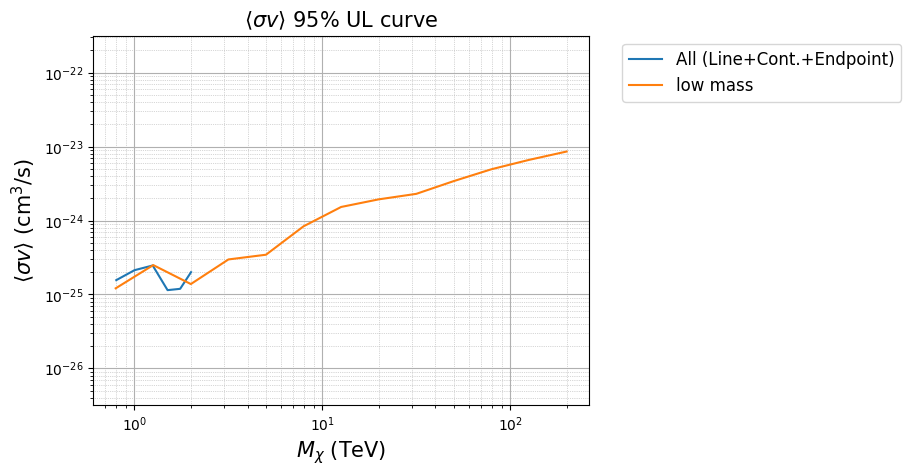

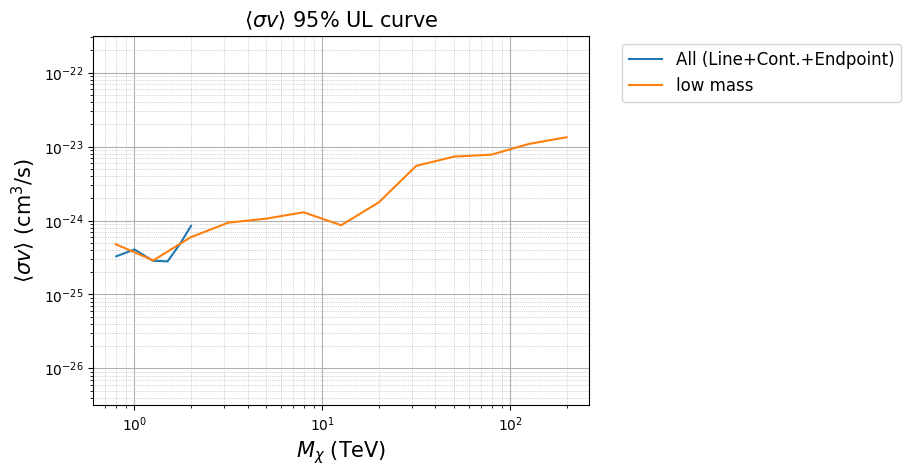

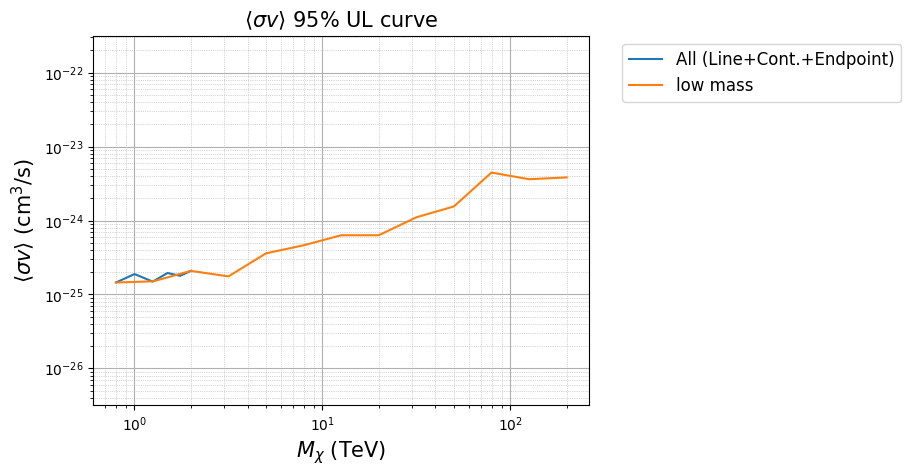

In [27]:
for dwarf in ["Segue_1", "UMi", "UMa_II"]:
    plotULcurve(f"wino_finer_{dwarf}_ep",  label="All (Line+Cont.+Endpoint)", units="TeV")
    plotULcurve(f"wino_finer_{dwarf}_in_low",  label="low mass", units="TeV")
    plt.show(block=False)

In [16]:
uls = []

#change_file("wino_dnde_res_hi", "wino_dnde_res_lo")

ebins = np.logspace(1, 7, 101)

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

for m in mass[::5]:
    diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
    new_ebins = 10**(ebins-diff)
    
    mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2,
                                         ext=True, DM_spectra="quintuplet",
                                         mass=[m], addTheta=False, averagedIRF=True, useBias=True, 
                                         correction=True, bkgModel="gaus", filename=False, 
                                         energyEdges=ebins, 
                                        )
    if np.size(mle) == 2:
        uls.append(mle)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 800 GeV
[Log] Maximum mass : 1 TeV


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_99643/2095937249.py:14: RuntimeWarning: overflow encountered in power
  diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_99643/2095937249.py:15: RuntimeWarning: overflow encountered in power
  new_ebins = 10**(ebins-diff)


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2000 GeV
[Log] Maximum mass : 2 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 3250 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 4500 GeV
[Log] Maximum mass : 4 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 5750 GeV
[Log] Maximum mass : 6 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 7000 GeV
[Log] Maximum mass : 7 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 8250 GeV
[Log] Maximum mass : 8 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 9500 GeV
[Log] Maximum mass : 10 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 11500 GeV
[Log] Maximum mass : 12 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 14000 GeV
[Log] Maximum mass : 14 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 16500 GeV
[Log] Maximum mass : 16 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 19000 GeV
[Log] Maximum mass : 19 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 21500 GeV
[Log] Maximum mass : 22 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 24000 GeV
[Log] Maximum mass : 24 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 26500 GeV
[Log] Maximum mass : 26 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 29000 GeV
[Log] Maximum mass : 29 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31500 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 34000 GeV
[Log] Maximum mass : 34 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 36500 GeV
[Log] Maximum mass : 36 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 39000 GeV
[Log] Maximum mass : 39 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 41500 GeV
[Log] Maximum mass : 42 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 44000 GeV
[Log] Maximum mass : 44 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 46500 GeV
[Log] Maximum mass : 46 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 49000 GeV
[Log] Maximum mass : 49 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 51500 GeV
[Log] Maximum mass : 52 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 54000 GeV
[Log] Maximum mass : 54 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56500 GeV
[Log] Maximum mass : 56 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 59000 GeV
[Log] Maximum mass : 59 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 61500 GeV
[Log] Maximum mass : 62 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 64000 GeV
[Log] Maximum mass : 64 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 66500 GeV
[Log] Maximum mass : 66 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 69000 GeV
[Log] Maximum mass : 69 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 71500 GeV
[Log] Maximum mass : 72 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 74000 GeV
[Log] Maximum mass : 74 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 76500 GeV
[Log] Maximum mass : 76 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 79000 GeV
[Log] Maximum mass : 79 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 81500 GeV
[Log] Maximum mass : 82 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 84000 GeV
[Log] Maximum mass : 84 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 86500 GeV
[Log] Maximum mass : 86 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 89000 GeV
[Log] Maximum mass : 89 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 91500 GeV
[Log] Maximum mass : 92 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 94000 GeV
[Log] Maximum mass : 94 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 96500 GeV
[Log] Maximum mass : 96 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 99000 GeV
[Log] Maximum mass : 99 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 107500 GeV
[Log] Maximum mass : 108 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 120000 GeV
[Log] Maximum mass : 120 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 132500 GeV
[Log] Maximum mass : 132 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 145000 GeV
[Log] Maximum mass : 145 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 157500 GeV
[Log] Maximum mass : 158 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 170000 GeV
[Log] Maximum mass : 170 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 182500 GeV
[Log] Maximum mass : 182 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 195000 GeV
[Log] Maximum mass : 195 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
 

## WINO

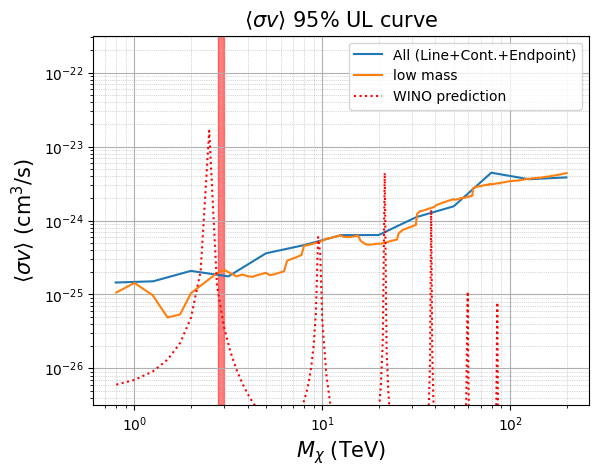

In [34]:
# plotULcurve("wino_final_latest_line_only",  label="Line only", units="TeV")
# plotULcurve("wino_final_latest_line_cont",  label="Line+Cont.", units="TeV")
plotULcurve("wino_finer_umaii_ep",  label="All (Line+Cont.+Endpoint)", units="TeV")
plotULcurve("wino_finer_final",  label="low mass", units="TeV")

plotPredictedLine(units="TeV", color="r", ls=":")
plt.axvspan(2.8, 3, color="r", alpha=0.5)
plt.legend(loc=1)

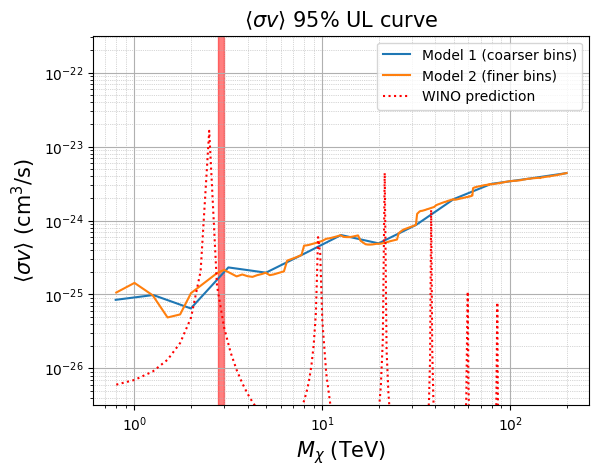

In [38]:
# plotULcurve("wino_final_latest_line_only",  label="Line only", units="TeV")
# plotULcurve("wino_final_latest_line_cont",  label="Line+Cont.", units="TeV")
plotULcurve("wino_finer_final_ep",  label="Model 1 (coarser bins)", units="TeV")
plotULcurve("wino_finer_final",  label="Model 2 (finer bins)", units="TeV")

plotPredictedLine(units="TeV", color="r", ls=":")
plt.axvspan(2.8, 3, color="r", alpha=0.5)
plt.legend(loc=1)

### WINO - shifted vs unshifted

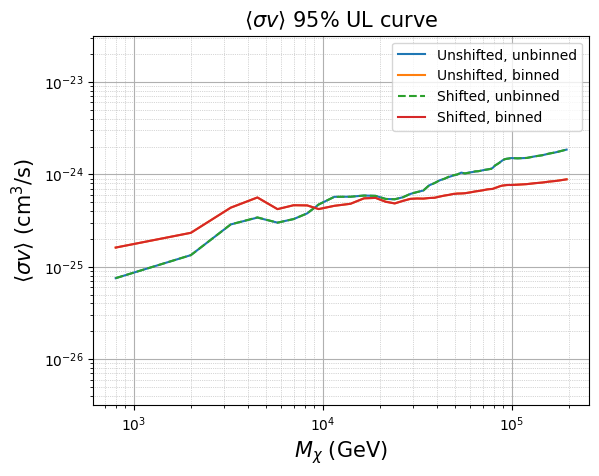

In [38]:
plotULcurve("wino_nlo_combined_unbinned", label="Unshifted, unbinned")
plotULcurve("wino_nlo_combined_binned", label="Unshifted, binned")

plotULcurve("EventDisplay_WINO_unbinned_shifted_old", label="Shifted, unbinned", ls="--")
plotULcurve("EventDisplay_WINO_binned_shifted_old",  label="Shifted, binned")
plt.legend(loc=1)

## Quintuplet

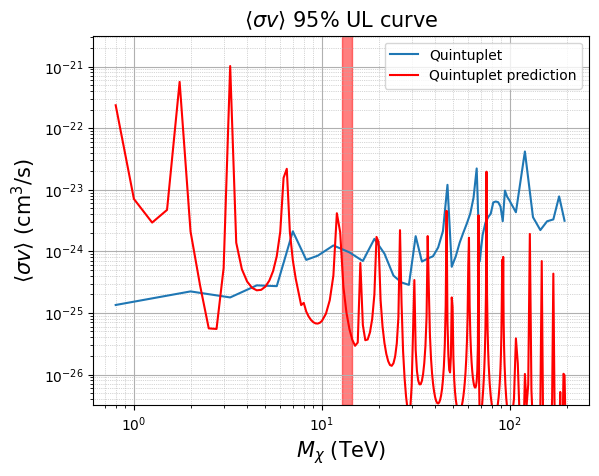

In [85]:
plotULcurve("quintuplet_final_latest_all", label="Quintuplet", units="TeV")
plotPredictedLine(color="r", quintuplet=True, label="Quintuplet prediction", units="TeV")
plt.legend(loc=1)
plt.axvspan(13.6-0.8, 13.6+0.8, color="r", alpha=0.5)

## WINO vs Quintuplet

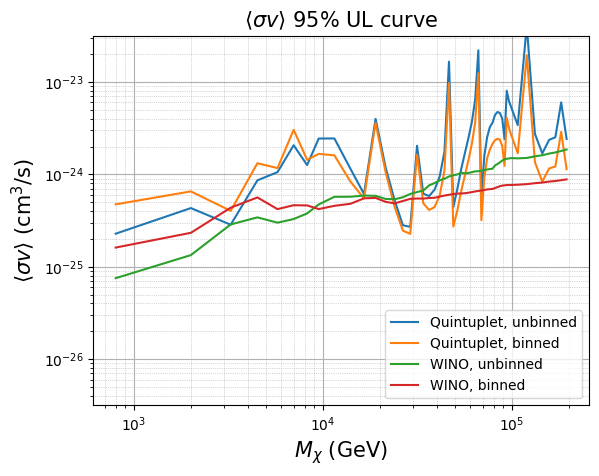

In [42]:
plotULcurve("EventDisplay_QLET_unbinned_old", label="Quintuplet, unbinned")
plotULcurve("EventDisplay_QLET_binned_old", label="Quintuplet, binned")
plotULcurve("EventDisplay_WINO_unbinned_shifted_old", label="WINO, unbinned")
plotULcurve("EventDisplay_WINO_binned_shifted_old",  label="WINO, binned")
plt.legend(loc=4)

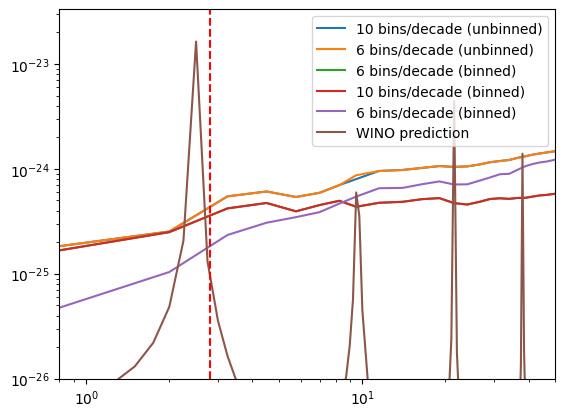

In [98]:
plt.plot(np.load("10.npy")[:,0][:,0]/10**3, 10**np.load("10.npy")[:,0][:,1], label="10 bins/decade (unbinned)")
plt.plot(np.load("6.npy")[:,0][:,0]/10**3, 10**np.load("6.npy")[:,0][:,1], label="6 bins/decade (unbinned)")
plt.plot(np.load("6_binned.npy")[:,0][:,0]/10**3, 10**np.load("6_binned.npy")[:,0][:,1], label="6 bins/decade (binned)")
plt.plot(np.load("10_binned.npy")[:,0][:,0]/10**3, 10**np.load("10_binned.npy")[:,0][:,1], label="10 bins/decade (binned)")
plt.plot(np.load("test.npy")[:,0][:,0]/10**3, 10**np.load("test.npy")[:,0][:,1], label="6 bins/decade (binned)")
#plt.plot(np.load("test_binned.npy")[:,0][:,0]/10**3, 10**np.load("test_binned.npy")[:,0][:,1], label="10 bins/decade (binned)")


plotPredictedLine(units="TeV")
plt.yscale("log")
plt.axvline(2.8, ls="--", color="red")
plt.xscale("log")
plt.ylim(1e-26)
plt.xlim(0.8, 50)
plt.legend()

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.


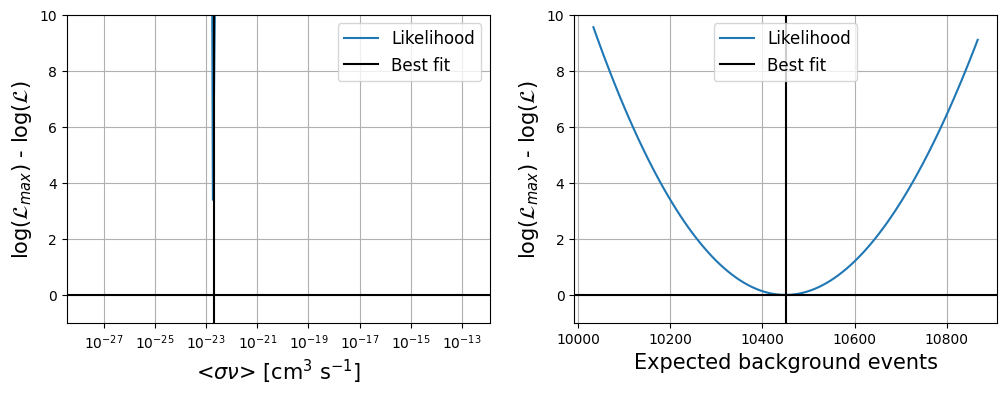

[Log, Error] The upper limit is not estimated (M=2.000 TeV).
[Log, Result] TS = 766.50 (M=2000 GeV)
[Log, Result] <σν> = 10^(-22.680 +/- 0.027)
[Log, Result] b = 10450 +/- 139 (null value: 11291)
[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = 3.54 (M=2000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-24.041) (equivalent to 9.11e-25)
[Log, Result] b = 11217 +/- 150 (null value: 11291)
[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = -0.00 (M=2000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-24.370) (e

[Log] Step 3: A source model is loaded.
[Log] Step 4: Assigning probabilities for each event...

[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
      Energy      
------------------
62290.446171057825


[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = -0.00 (M=2000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-24.779) (equivalent to 1.66e-25)
[Log, Result] b = 11290 +/- 138 (null value: 11291)
[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: Assigning probabilities for each event...

[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
      Energy      
------------------
62290.446171057825


[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Resul

In [103]:
sig = []
for i in np.arange(10, 200, step=10):
    mle = Likelihood.MLE("Segue_1", 2000, DM_spectra="wino", channel="wino", ext=True, bkgModel="gaus", 
                     energyEdges = np.geomspace(10, 10**7, i))
    mle.minuit(method=2)
    sig.append(mle.signu_ul)

# Shift bins

In [126]:
sig_s = []
for i in range(60):
    mle = Likelihood.MLE("Segue_1", 3000, DM_spectra="wino", channel="wino", ext=True, bkgModel="gaus", 
                     energyEdges = np.logspace(1+0.001*i, 7+0.01*i, 101), verbose=False)
    mle.minuit(method=2)
    sig_s.append(mle.signu_ul)

ERROR! Session/line number was not unique in database. History logging moved to new session 2061


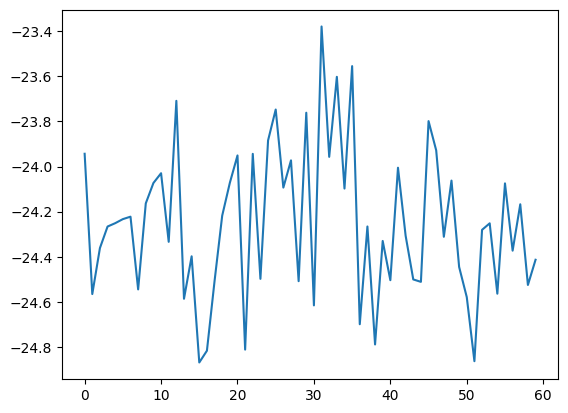

In [127]:
plt.plot(range(60), sig_s)